# **Load data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
data_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(data_path)
n = data.shape[0]
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

# **data preprocessing**

In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

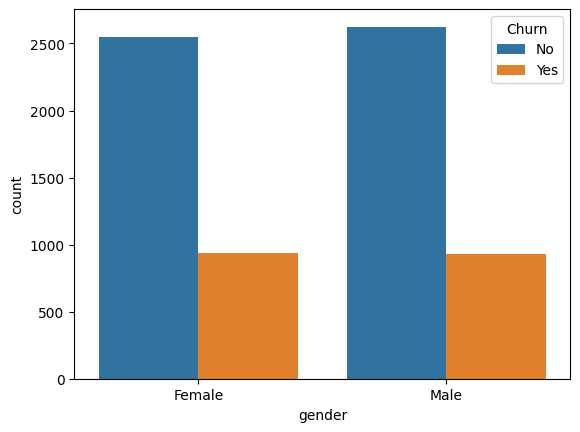

In [4]:
#Gender Distribution - About half of the customers in our data set are male while the other half are female
ax = sns.countplot(x="gender", hue="Churn", data=data)
plt.show()

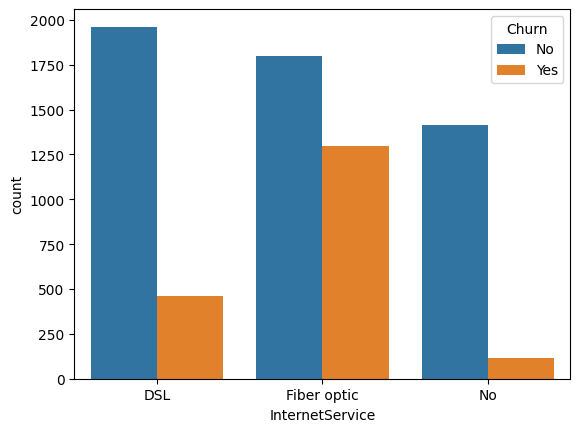

In [5]:
ax = sns.countplot(x="InternetService", hue="Churn", data=data)
plt.show()

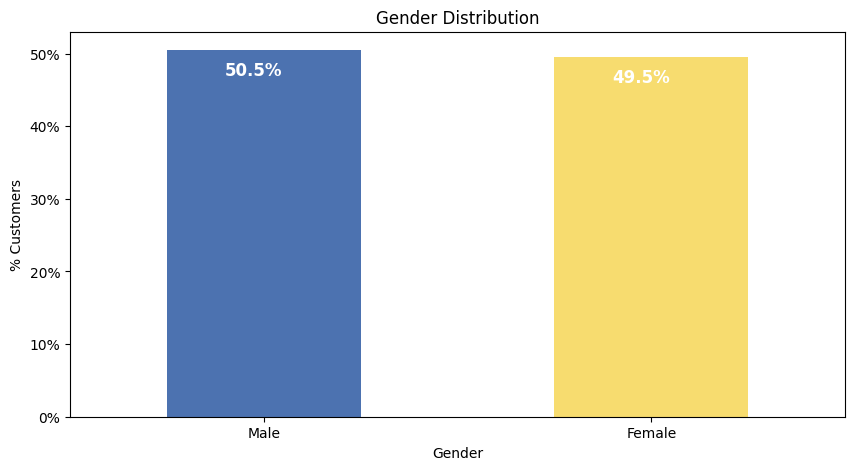

In [6]:
import matplotlib.ticker as mtick
ax = (data['gender'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = ['#4C72B0','#F7DC6F'],
                                                                          figsize = (10,5)
                                                                          )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

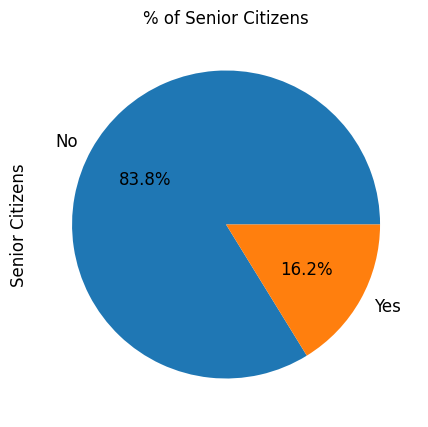

In [7]:
ax = (data['SeniorCitizen'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **First checks**

# **null values**

In [9]:
# First checks
print('Features non-null values and data type:')
data.info()

Features non-null values and data type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pa

# **missing values**

In [10]:
# verification of null values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# **duplicate values**

In [11]:
# check if there are a duplicated values or not
print(f"Number of duplicates: {data.duplicated().sum()}")

Number of duplicates: 0


In [12]:
# Converting Total Charges to a numerical data type.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [13]:
#Removing missing values
data.dropna(inplace = True)

In [14]:
#Remove customer IDs from the data set
df2 = data.iloc[:,1:]

In [15]:
#Convertin the predictor variable in a binary numeric variable
#df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
#df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
#df_dummies = pd.get_dummies(df2)
#df_dummies.head()

# **Correlation**

In [16]:
#Get Correlation of "Churn" with other variables:
#plt.figure(figsize=(15,8))
#df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# **Outliners**

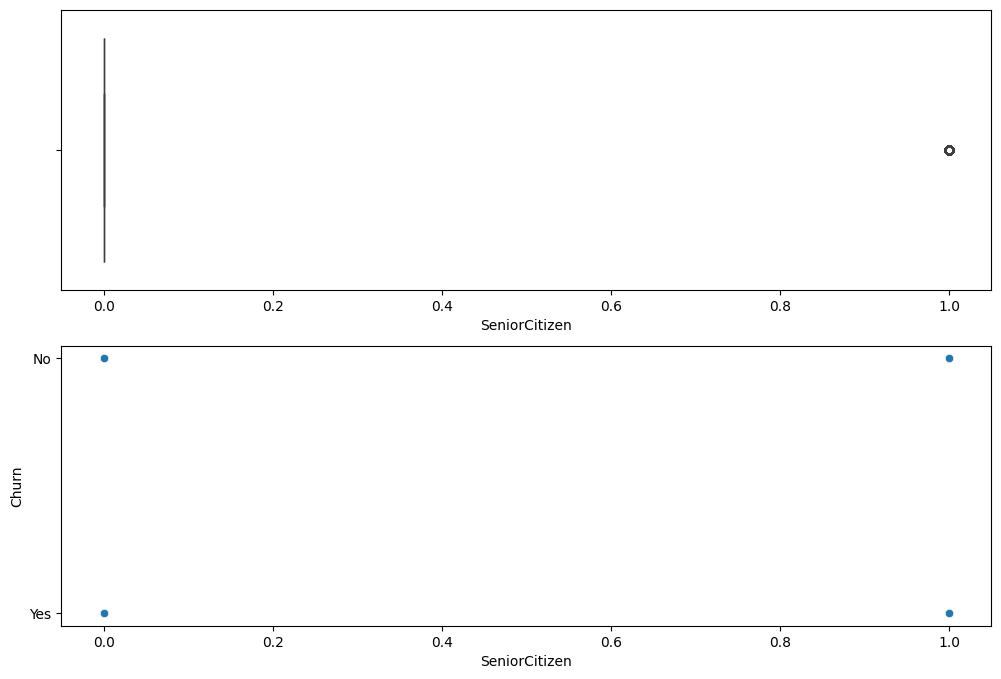

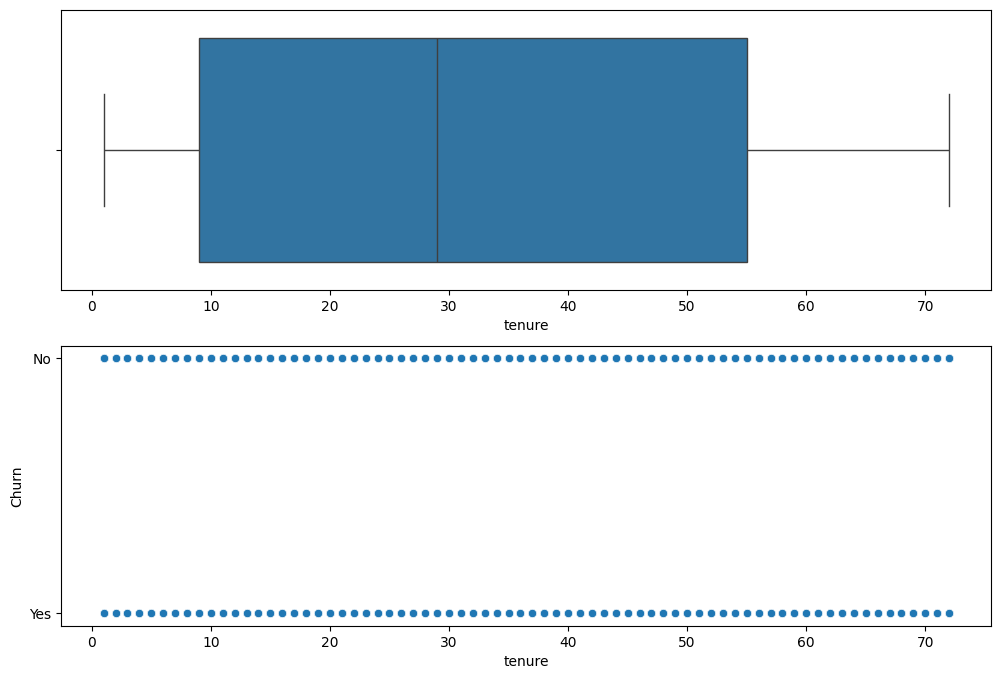

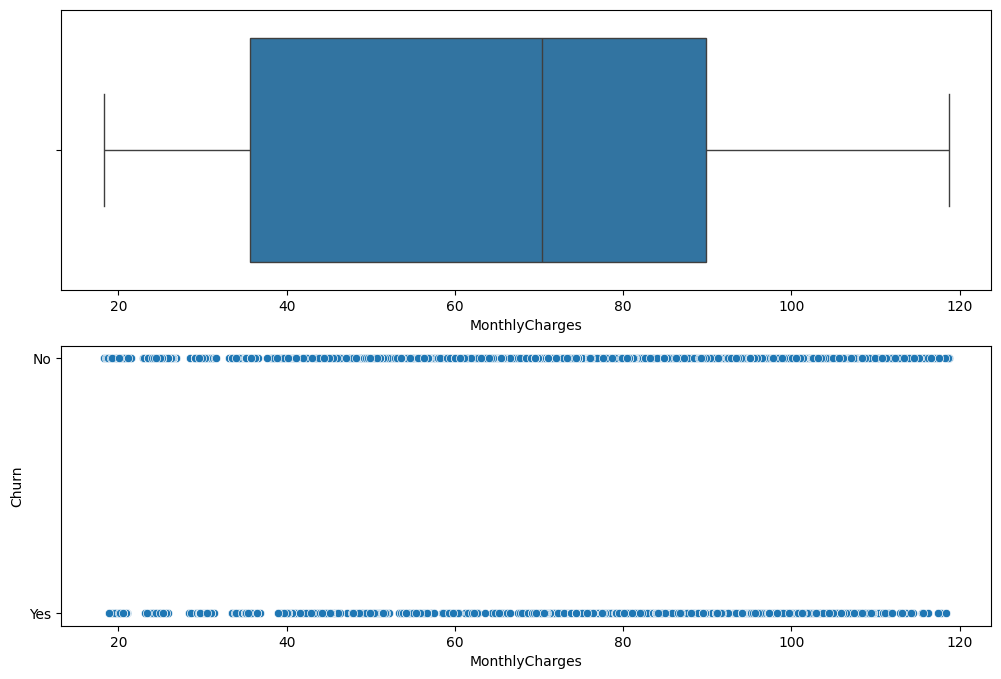

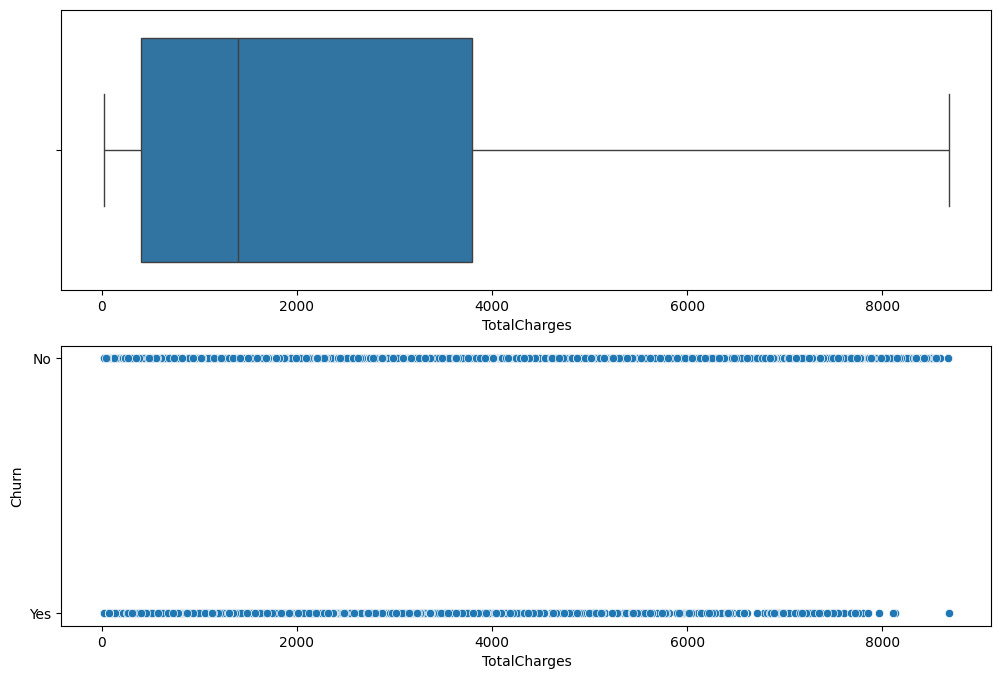

In [17]:
for col in data:
    if col != 'Churn' and pd.api.types.is_numeric_dtype(data[col]):
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
        g1 = sns.boxplot(x = data[col], ax=ax[0])
        g2 = sns.scatterplot(data=data, x=data[col],y=data['Churn'], ax=ax[1])
        plt.show()

# **Label Encoding**

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                df[col] = label_encoder.fit_transform(df[col])

le(data)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Or use 'median', 'most_frequent', etc.
input_data_imputed = pd.DataFrame(imputer.fit_transform(data))
input_data_imputed.columns = data.columns



In [20]:
input_data_dropped =data.dropna()  # Drops rows with any missing values


# **Feature selection**

In [21]:
X=data.drop(['Churn'],axis=1)
Y=data['Churn']
print(X)
print(Y)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5365       0              0        1           0       1   
1           3953       1              0        0           0      34   
2           2558       1              0        0           0       2   
3           5524       1              0        0           0      45   
4           6500       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4843       1              0        1           1      24   
7039        1524       0              0        1           1      72   
7040        3358       0              0        1           1      11   
7041        5923       1              1        1           0       4   
7042        2221       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  \
0                0              1                0               

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X, Y)

# Convert X back to a DataFrame if it's not already
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)  # Assuming you have the column names somewhere

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features
selected_features= ['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [23]:
X = X[selected_features]
print(X)

      gender  SeniorCitizen  Partner  Dependents  tenure  InternetService  \
0          0              0        1           0       1                0   
1          1              0        0           0      34                0   
2          1              0        0           0       2                0   
3          1              0        0           0      45                0   
4          0              0        0           0       2                1   
...      ...            ...      ...         ...     ...              ...   
7038       1              0        1           1      24                0   
7039       0              0        1           1      72                1   
7040       0              0        1           1      11                0   
7041       1              1        1           0       4                1   
7042       1              0        0           0      66                1   

      OnlineSecurity  OnlineBackup  TechSupport  Contract  PaymentMethod  \

In [24]:
data=data[selected_features]

# **scale the data**

In [25]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler
scale = StandardScaler() # Reinitialize for new data
X_train = scale.fit_transform(X)

# **split the data**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split
# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(5625, 13) (1407, 13)
(5625,) (1407,)


In [27]:
# Initialize and fit the imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# **Modeling**

# **Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [29]:
yhat_lr = LR.predict(X_test)
yhat_lr

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat_lr,pos_label=0)

0.7440132122213047

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, yhat_lr, labels=[1,0]))

[[196 178]
 [132 901]]


Confusion matrix, without normalization
[[196 178]
 [132 901]]


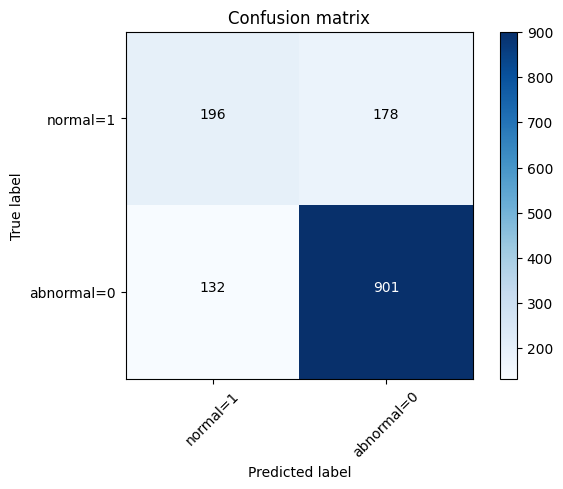

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, yhat_lr, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['normal=1','abnormal=0'],normalize= False,  title='Confusion matrix')

In [35]:
print (classification_report(Y_test, yhat_lr))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.60      0.52      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



# **KNeighborsClassifier**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat_knn=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat_knn) # Use the correct variable name 'yhat'


    std_acc[n-1]=np.std(yhat_knn==Y_test)/np.sqrt(yhat_knn.shape[0])

mean_acc

array([0.72, 0.76, 0.76, 0.77, 0.77, 0.78, 0.77, 0.78, 0.78])

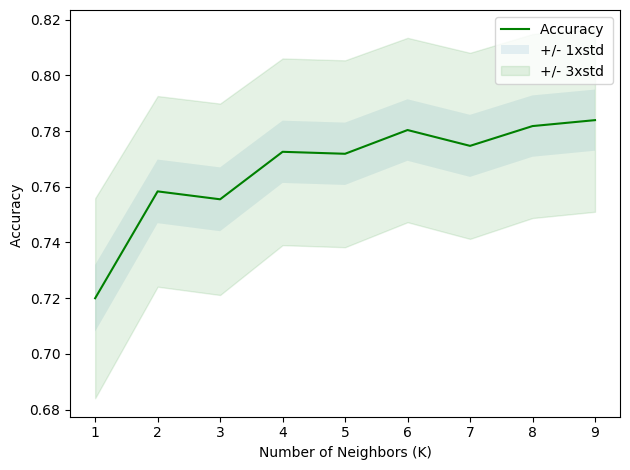

In [37]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [38]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7839374555792467 with k= 9


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.63      0.45      0.53       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407

Confusion matrix, without normalization
[[935  98]
 [206 168]]


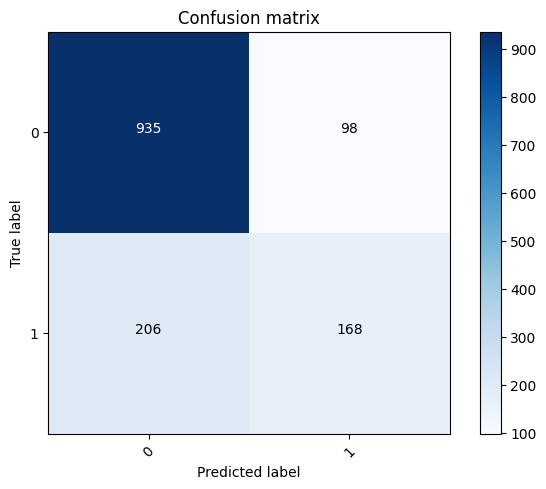

In [40]:
# Compute confusion matrix, try to infer the labels from the data
cnf_matrix = confusion_matrix(Y_test, yhat_knn)
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat_knn))

# Get the unique class labels that actually exist
classes = np.unique(Y_test)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize= False,  title='Confusion matrix')

# **XGBoost Gradient Boosting Model**

In [41]:
#!pip install xgboost # Install XGBoost library
from xgboost import XGBClassifier # Import XGBClassifier
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
xgb_train, xgb_test = xgb_model.score(X_train , Y_train), xgb_model.score(X_test , Y_test)

print(f"Training Score: {xgb_train}")
print(f"Test Score: {xgb_test}")

Training Score: 0.928
Test Score: 0.7732764747690121


In [42]:
yhat_xgb = xgb_model.predict(X_test)
yhat_xgb [0:5]

array([0, 0, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407

Confusion matrix, without normalization
[[900 133]
 [186 188]]


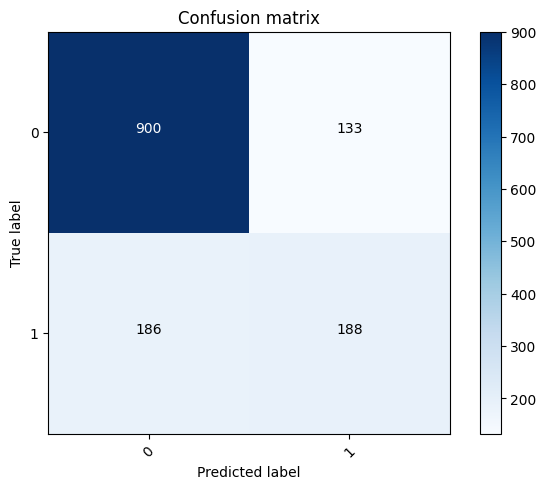

In [43]:
# Compute confusion matrix, try to infer the labels from the data
cnf_matrix = confusion_matrix(Y_test, yhat_xgb)
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat_xgb))

# Get the unique class labels that actually exist
classes = np.unique(Y_test)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize= False,  title='Confusion matrix')

# **Decision Tree**

In [44]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [45]:
drugTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [46]:
yhat_dt = drugTree.predict(X_test)

In [47]:
print (yhat_dt [0:5])
print (Y_test [0:5])


[0 0 1 0 0]
2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64


In [48]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, yhat_dt))

DecisionTrees's Accuracy:  0.7512437810945274


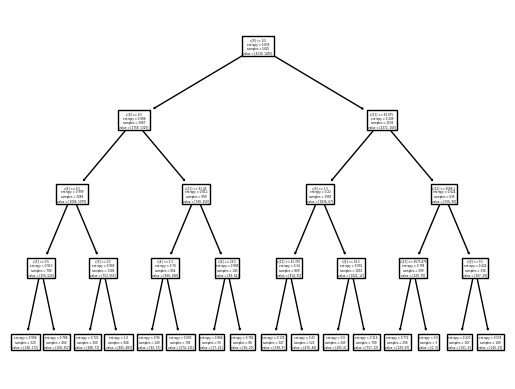

In [49]:
tree.plot_tree(drugTree)
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1033
           1       0.53      0.65      0.58       374

    accuracy                           0.75      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.75      0.76      1407

Confusion matrix, without normalization
[[815 218]
 [132 242]]


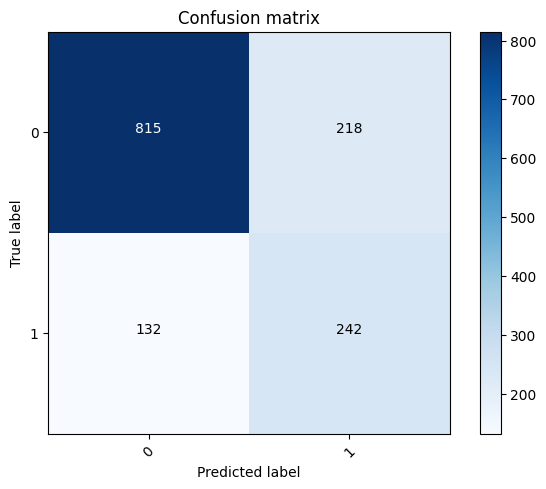

In [50]:
# Compute confusion matrix, try to infer the labels from the data
cnf_matrix = confusion_matrix(Y_test, yhat_dt)
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat_dt))

# Get the unique class labels that actually exist
classes = np.unique(Y_test)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize= False,  title='Confusion matrix')

# **Random Forest**

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Assuming 'study_rf' comes from a hyperparameter optimization (e.g., Optuna)
# Replace these with the actual best parameters if you have them
best_params = {
  'rf_max_features': 'sqrt',  # Example value
  'rf_max_depth': 10,        # Example value
  'rf_n_estimators': 100     # Example value
}

rf = RandomForestClassifier(
  max_features=best_params['rf_max_features'],
  max_depth=best_params['rf_max_depth'],
  n_estimators=best_params['rf_n_estimators']
)
rf.fit(X_train, Y_train)

rf_train, rf_test = rf.score(X_train, Y_train), rf.score(X_test, Y_test)

print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

Train Score: 0.8810666666666667
Test Score: 0.7903340440653873


In [52]:
yhat_rf = rf.predict(X_test)
yhat_rf [0:5]

array([0, 0, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion matrix, without normalization
[[929 104]
 [191 183]]


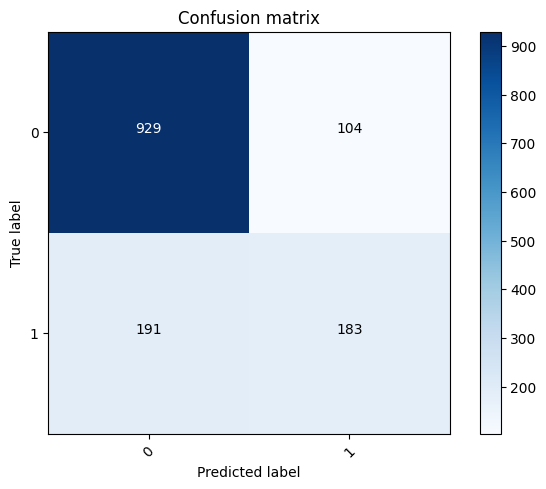

In [53]:
# Compute confusion matrix, try to infer the labels from the data
cnf_matrix = confusion_matrix(Y_test, yhat_rf)
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat_rf))

# Get the unique class labels that actually exist
classes = np.unique(Y_test)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize= False,  title='Confusion matrix')

In [54]:
# Assuming you have already trained and evaluated your models (LR, KNN, XGBoost, Decision Tree, Random Forest)
# and have the predicted values (yhat_lr, yhat_knn, yhat_xgb, yhat_dt, yhat_rf) and true labels (Y_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = ['Logistic Regression' ,'KNeighborsClassifier', 'XGBoost', 'Decision Tree', 'Random Forest']
predictions = [yhat_lr,yhat_knn, yhat_xgb, yhat_dt, yhat_rf]

results = []
for model, yhat in zip(models, predictions):
    accuracy = accuracy_score(Y_test, yhat)
    precision = precision_score(Y_test, yhat)
    recall = recall_score(Y_test, yhat)
    f1 = f1_score(Y_test, yhat)
    results.append([model, accuracy, precision, recall, f1])

# Create a pandas DataFrame for the results
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Display the table
print(df_results)

                  Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression  0.779673   0.597561  0.524064  0.558405
1  KNeighborsClassifier  0.783937   0.631579  0.449198  0.525000
2               XGBoost  0.773276   0.585670  0.502674  0.541007
3         Decision Tree  0.751244   0.526087  0.647059  0.580336
4         Random Forest  0.790334   0.637631  0.489305  0.553707


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)
y_pred_lr = grid_search.best_estimator_.predict(X_test)  # Use best_estimator_

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:  0.8001777777777777


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,9,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the model
model = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)
y_pred_knn = grid_search.best_estimator_.predict(X_test)  # Use best_estimator_

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Best score:  0.7829333333333335


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = DecisionTreeClassifier()


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)
y_pred_dt = grid_search.best_estimator_.predict(X_test)  # Use best_estimator_

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score:  0.7747555555555555


In [59]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)
y_pred_xgb = grid_search.best_estimator_.predict(X_test)  # Use best_estimator_

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best score:  0.8060444444444445


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:52:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)
y_pred_rf = grid_search.best_estimator_.predict(X_test)  # Use best_estimator_
# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best score:  0.8037333333333333


In [62]:
# Assuming you have already trained and evaluated your models (LR, KNN, XGBoost, Decision Tree, Random Forest)
# and have the predicted values (yhat_lr, yhat_knn, yhat_xgb, yhat_dt, yhat_rf) and true labels (Y_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = ['Logistic Regression' ,'KNeighborsClassifier', 'XGBoost', 'Decision Tree', 'Random Forest']
predictions = [y_pred_lr,y_pred_knn, y_pred_xgb, y_pred_dt, y_pred_rf]

results = []
for model, yhat in zip(models, predictions):
    accuracy = accuracy_score(Y_test, yhat)
    precision = precision_score(Y_test, yhat)
    recall = recall_score(Y_test, yhat)
    f1 = f1_score(Y_test, yhat)
    results.append([model, accuracy, precision, recall, f1])

# Create a pandas DataFrame for the results
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Display the table
print(df_results)

                  Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression  0.779673   0.598160  0.521390  0.557143
1  KNeighborsClassifier  0.786070   0.660793  0.401070  0.499168
2               XGBoost  0.783227   0.619377  0.478610  0.539970
3         Decision Tree  0.771144   0.573034  0.545455  0.558904
4         Random Forest  0.787491   0.630662  0.483957  0.547655


In [63]:
from sklearn.ensemble import RandomForestClassifier

# Regularization using hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,  # Limits depth of trees
    min_samples_split=5,  # Minimum samples required to split an internal node
    min_samples_leaf=4,  # Minimum samples required to be at a leaf node
    max_features='sqrt',  # Number of features to consider when looking for the best split
    random_state=42
)
rf_model.fit(X_train, Y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)

# **RandomForestClassifier**

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

# Assuming 'study_rf' comes from a hyperparameter optimization (e.g., Optuna)
# Replace these with the actual best parameters if you have them
#best_params = {
 #   'rf_max_features': 'sqrt',  # Example value
 #   'rf_max_depth': 10,        # Example value
  #  'rf_n_estimators': 100     # Example value
#}

#model = RandomForestClassifier(
    #max_features=best_params['rf_max_features'],
    #max_depth=best_params['rf_max_depth'],
    #n_estimators=best_params['rf_n_estimators']
#)
#model.fit(X_train, Y_train)

#rf_train, rf_test = model.score(X_train, Y_train), model.score(X_test, Y_test)
#Y_pred = model.predict(X_test)
#print(f"Train Score: {rf_train}")
#print(f"Test Score: {rf_test}")
#print("Accuracy: ", accuracy_score(Y_test,Y_pred))
#print("Precision: ", precision_score(Y_test,Y_pred))

In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#sample=[[5365,1,0,0,2,0,0,2,29.85,29.85]]
#sample=[['5090-VHVEG',1,'DSL','no',2,'No','Month-to-Month','Elecronic check',29.85,29.85]]
# Initialize LabelEncoder
#le = LabelEncoder()

# Encode all categorical features
#sample_encoded = [le.fit_transform([item])[0] if isinstance(item, str) else item for item in sample[0]]

# Now, try predicting with the fully encoded sample:
#predictions = model.predict([sample_encoded])  # Wrap in a list as predict expects 2D input
#if predictions==1 :
 #   print('predictions :churn')
#else :
 #     print('predictions :not churn')

In [67]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the HistGradientBoostingClassifier model
model = HistGradientBoostingClassifier()
model.fit(X_train_imputed, Y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.78


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but HistGradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [68]:

import joblib
scaler = StandardScaler()
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
   label_encoders[column] = LabelEncoder()
   data[column] = label_encoders[column].fit_transform(data[column])
# Save the model
joblib.dump(model, 'model.joblib')
joblib.dump(imputer, 'imputer.joblib')
# Save the scaler and label encoders for preprocessing during inference
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(label_encoders, 'label_encoders.joblib')


['label_encoders.joblib']

In [ ]:
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score # Import necessary metrics
#import seaborn as sns
#import matplotlib.pyplot as plt
#from sklearn.ensemble import svc

#svc = SVC(kernel='poly', gamma=1.0)
#svc.fit(X_train,Y_train)
#Y_pred = svc.predict(X_test)
#report = classification_report(Y_test, Y_pred) # Now classification_report is defined
#cm = confusion_matrix(Y_test, Y_pred)
#print('Support Vector Machine Model')
# Make sure you use the correct variable name here, it should be Y_test not y_test
#print("Accuracy: ", accuracy_score(Y_test,Y_pred))
#print("Precision: ", precision_score(Y_test,Y_pred))
#print("Classification Report:\n", report)
#plt.figure(figsize=(6, 4))
#sns.heatmap(cm, annot=True, fmt='d', cbar=False)
#plt.xlabel('Predicted')
#plt.ylabel('True')
#plt.title("Confusion Matrix")
#plt.show()